<a href="https://colab.research.google.com/github/dnmquan1110/PredictFutureSales/blob/main/PredictFutureSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using kaggle.json to download dataset from kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download competitive-data-science-predict-future-sales

 33% 5.00M/15.1M [00:00<00:00, 38.2MB/s]
100% 15.1M/15.1M [00:00<00:00, 73.2MB/s]


In [ ]:
!unzip '/content/competitive-data-science-predict-future-sales.zip'

Archive:  /content/competitive-data-science-predict-future-sales.zip
  inflating: item_categories.csv     
  inflating: items.csv               
  inflating: sales_train.csv         
  inflating: sample_submission.csv   
  inflating: shops.csv               
  inflating: test.csv                


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('float_format', '{:f}'.format)
palette = sns.color_palette('Set1')

In [ ]:
item_categories_df = pd.read_csv('item_categories.csv')
item_df = pd.read_csv('items.csv')
sales_df = pd.read_csv('sales_train.csv')
shops_df = pd.read_csv('shops.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

## Data Exploration

In [ ]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
item_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
item_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [ ]:
sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000000,1.000000
1,03.01.2013,0,25,2552,899.000000,1.000000
2,05.01.2013,0,25,2552,899.000000,-1.000000
3,06.01.2013,0,25,2554,1709.050000,1.000000
4,15.01.2013,0,25,2555,1099.000000,1.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
sales_df['date'] = pd.to_datetime(sales_df.date.apply(lambda x: x[6:] + '-' + x[3:5] + '-' + x[:2]))

In [ ]:
sales_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.000000,2935849.000000,2935849.000000,2935849.000000,2935849.000000
mean,14.569911,33.001728,10197.227057,890.853233,1.242641
std,9.422988,16.226973,6324.297354,1729.799631,2.618834
min,0.000000,0.000000,0.000000,-1.000000,-22.000000
25%,7.000000,22.000000,4476.000000,249.000000,1.000000
50%,14.000000,31.000000,9343.000000,399.000000,1.000000
75%,23.000000,47.000000,15684.000000,999.000000,1.000000
max,33.000000,59.000000,22169.000000,307980.000000,2169.000000


Chek negative item price

In [ ]:
sales_df[sales_df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.000000,1.000000


In [ ]:
#check if are there any items have the same shop_id and item_id and if they have them same item_price.
#If yes, rewrite the item_price -1 by this same item_price. Else drop this row.
sales_df[(sales_df['item_id']==2973) & (sales_df['shop_id'] == 32)].sort_values('date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
67433,2013-01-15,0,32,2973,2499.000000,3.000000
67432,2013-01-17,0,32,2973,2499.000000,1.000000
67431,2013-01-18,0,32,2973,2499.000000,1.000000
67430,2013-01-21,0,32,2973,2499.000000,1.000000
67429,2013-01-22,0,32,2973,2499.000000,1.000000
67428,2013-01-25,0,32,2973,2499.000000,1.000000
67427,2013-01-29,0,32,2973,2499.000000,1.000000
187844,2013-02-05,1,32,2973,2499.000000,1.000000
187845,2013-02-14,1,32,2973,2499.000000,1.000000
484684,2013-05-06,4,32,2973,2499.000000,1.000000


In [ ]:
# choose option to drop the row
sales_df = sales_df.drop(484683)

Check why item_cnt_day have negative columns: is that a typo or any reason else. I think the negative item_cnt_day of products is return by the customer who have buy them before

In [ ]:
neg_item_cnt_df = sales_df[sales_df['item_cnt_day'] < 0]
neg_item_cnt_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.000000,-1.000000
148,2013-01-23,0,25,2321,999.000000,-1.000000
175,2013-01-07,0,25,2199,1449.000000,-1.000000
807,2013-01-02,0,25,2330,599.000000,-1.000000
1041,2013-01-13,0,25,5034,1989.000000,-1.000000
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.000000,-1.000000
2934462,2015-10-18,33,25,4896,6398.000000,-1.000000
2935263,2015-10-05,33,25,10039,249.000000,-1.000000
2935643,2015-10-16,33,25,7893,2990.000000,-1.000000


In [ ]:
not_buy_before = []
for i in range(50):
  row = neg_item_cnt_df.iloc[i]
  if sales_df[(sales_df['shop_id'] == row.shop_id) & (sales_df['item_id'] == row.item_id) & (sales_df['item_price'] == row.item_price)
   & (sales_df['date'] < row.date) & (sales_df['item_cnt_day'] == row.item_cnt_day*-1)].empty: not_buy_before.append(row)

print(len(not_buy_before))

20


In [ ]:
check = not_buy_before[0]
sales_df[(sales_df['shop_id'] == check.shop_id) & (sales_df['item_id'] == check.item_id) & (sales_df['item_price'] == check.item_price)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
807,2013-01-02,0,25,2330,599.000000,-1.000000
808,2013-01-06,0,25,2330,599.000000,1.000000
809,2013-01-21,0,25,2330,599.000000,1.000000
155088,2013-02-20,1,25,2330,599.000000,1.000000
155109,2013-02-22,1,25,2330,599.000000,1.000000
324429,2013-03-08,2,25,2330,599.000000,1.000000
324452,2013-03-24,2,25,2330,599.000000,1.000000
452766,2013-05-20,4,25,2330,599.000000,1.000000


The reason of negative item_cnt_day is not clear. So, suppose that there is a typo, we can denoise by multiply -1 to all of negative item_cnt_day

In [ ]:
sales_df['item_cnt_day'] = sales_df['item_cnt_day'].abs()

Display another dataframe

In [ ]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
shops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
len(test_df)

214200

In [ ]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.500000
1,1,0.500000
2,2,0.500000
3,3,0.500000
4,4,0.500000


# Visualize some info about **sales_train.csv**

In [ ]:
sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.000000,1.000000
1,2013-01-03,0,25,2552,899.000000,1.000000
2,2013-01-05,0,25,2552,899.000000,1.000000
3,2013-01-06,0,25,2554,1709.050000,1.000000
4,2013-01-15,0,25,2555,1099.000000,1.000000


In [ ]:
sales_df['year'] = sales_df.date.dt.year
sales_df['month'] = sales_df.date.dt.month
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,2013-01-02,0,59,22154,999.000000,1.000000,2013,1
1,2013-01-03,0,25,2552,899.000000,1.000000,2013,1
2,2013-01-05,0,25,2552,899.000000,1.000000,2013,1
3,2013-01-06,0,25,2554,1709.050000,1.000000,2013,1
4,2013-01-15,0,25,2555,1099.000000,1.000000,2013,1
...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.000000,1.000000,2015,10
2935845,2015-10-09,33,25,7460,299.000000,1.000000,2015,10
2935846,2015-10-14,33,25,7459,349.000000,1.000000,2015,10
2935847,2015-10-22,33,25,7440,299.000000,1.000000,2015,10


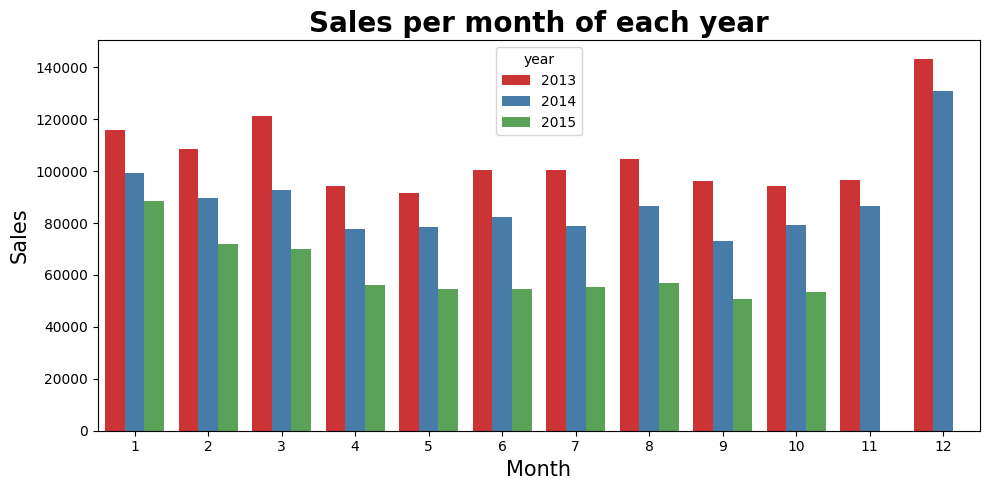

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='year',data=sales_df,palette='Set1')
plt.title('Sales per month of each year',fontsize=20, fontweight='bold')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.tight_layout()
plt.show()

<ipython-input-30-869725ec3fb9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  decrease_order = sales_df.corr().nlargest(18, 'item_cnt_day')['item_cnt_day'].index


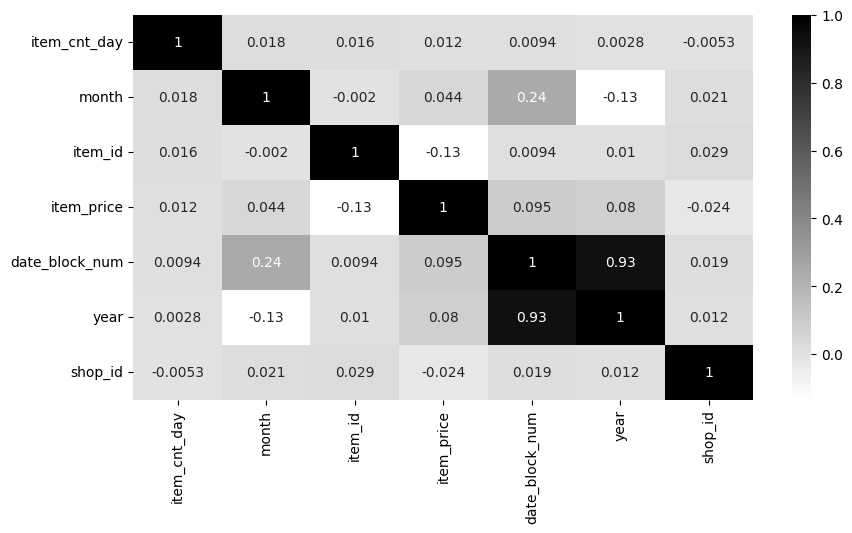

In [ ]:
plt.figure(figsize=(10,5))
decrease_order = sales_df.corr().nlargest(18, 'item_cnt_day')['item_cnt_day'].index
sns.heatmap(sales_df[decrease_order].corr(),annot=True,cmap='binary')
plt.show()

In [ ]:
sales_df.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False).reset_index()

,item_id,item_cnt_day
0,20949,187678.000000
1,2808,17265.000000
2,3732,16710.000000
3,17717,15830.000000
4,5822,14529.000000
...,...,...
21802,10799,1.000000
21803,10835,1.000000
21804,10850,1.000000
21805,10878,1.000000


In [ ]:
item_category_dist = item_df.groupby('item_category_id')['item_id'].count().reset_index().sort_values(by='item_id',ascending=False)
item_category_dist

,item_category_id,item_id
40,40,5035
55,55,2365
37,37,1780
31,31,1125
58,58,790
...,...,...
1,1,2
50,50,2
10,10,1
79,79,1


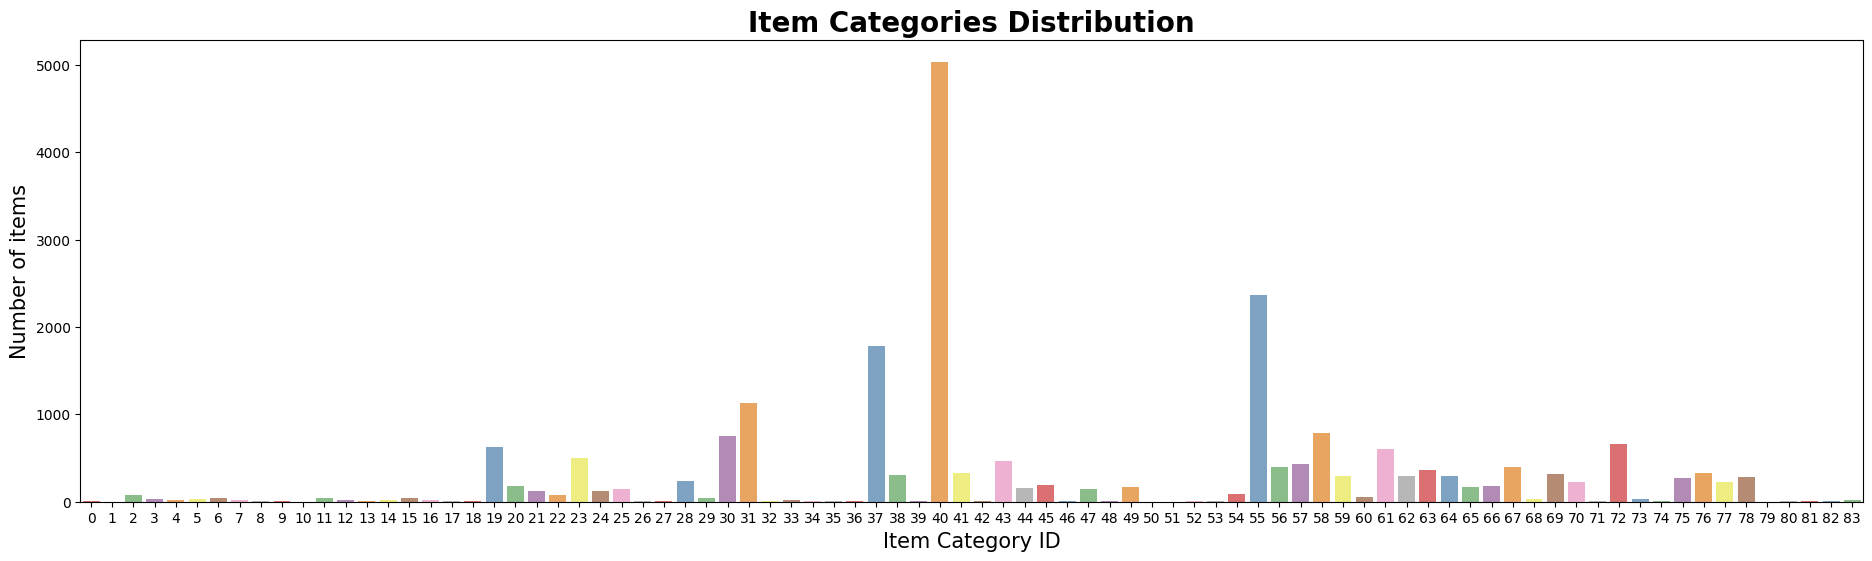

In [ ]:
plt.figure(figsize=(23,6))
item_category_dist = item_df.groupby('item_category_id')['item_id'].count().reset_index().sort_values(by='item_id',ascending=False)
sns.barplot(data=item_category_dist,x='item_category_id', y = 'item_id', alpha=0.7,palette='Set1')
plt.title('Item Categories Distribution',fontsize=20,fontweight='bold')
plt.xlabel('Item Category ID',fontsize=15)
plt.ylabel('Number of items',fontsize=15)
plt.show()

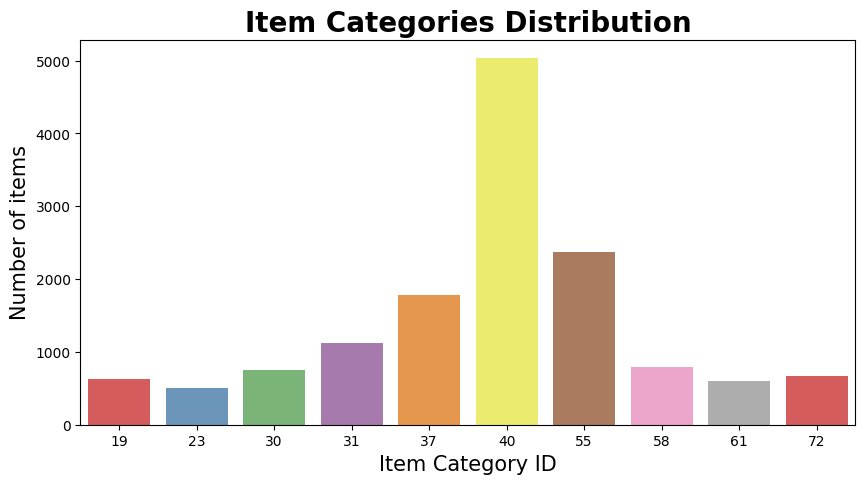

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = item_category_dist[:10], x='item_category_id', y='item_id', alpha=0.8,palette='Set1')
plt.title('Item Categories Distribution',fontsize=20,fontweight='bold')
plt.xlabel('Item Category ID',fontsize=15)
plt.ylabel('Number of items',fontsize=15)
plt.show()

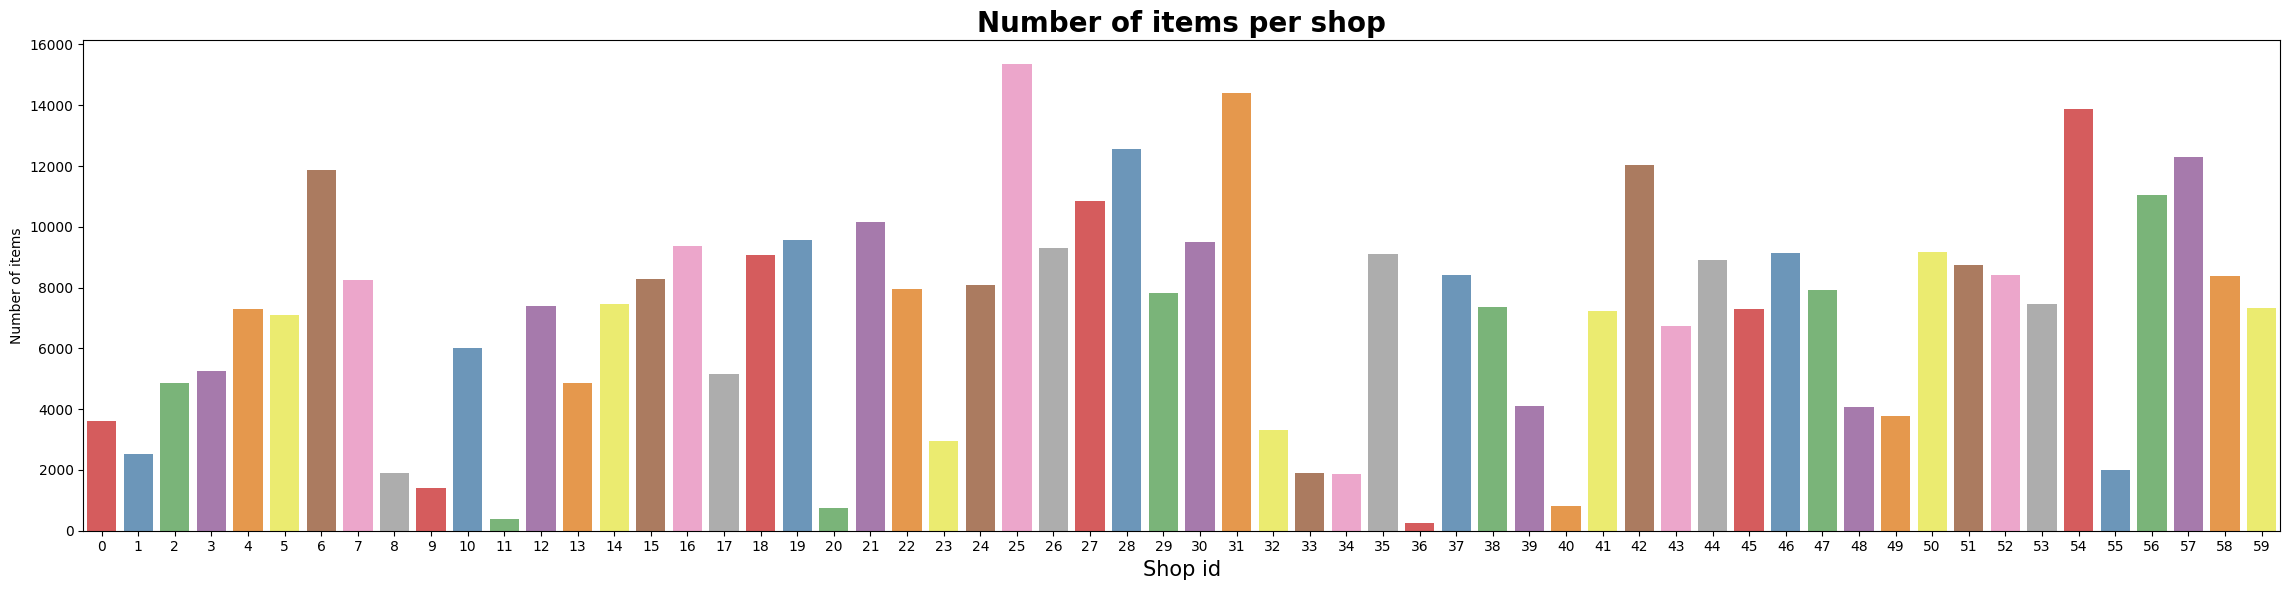

In [ ]:
item_dist_shop = sales_df[['shop_id','item_id']].drop_duplicates().groupby('shop_id')['item_id'].count().reset_index()
plt.figure(figsize=(23,6))
sns.barplot(data=item_dist_shop, x='shop_id',y='item_id',alpha=.8,palette='Set1')
plt.title('Number of items per shop',fontsize=20,fontweight='bold')
plt.xlabel('Shop id', fontsize=15)
plt.ylabel('Number of items')
plt.tight_layout()
plt.show()

In [ ]:
item_df.groupby('item_category_id')['item_id'].count().reset_index().sort_values(by='item_id',ascending=False)

,item_category_id,item_id
40,40,5035
55,55,2365
37,37,1780
31,31,1125
58,58,790
...,...,...
1,1,2
50,50,2
10,10,1
79,79,1


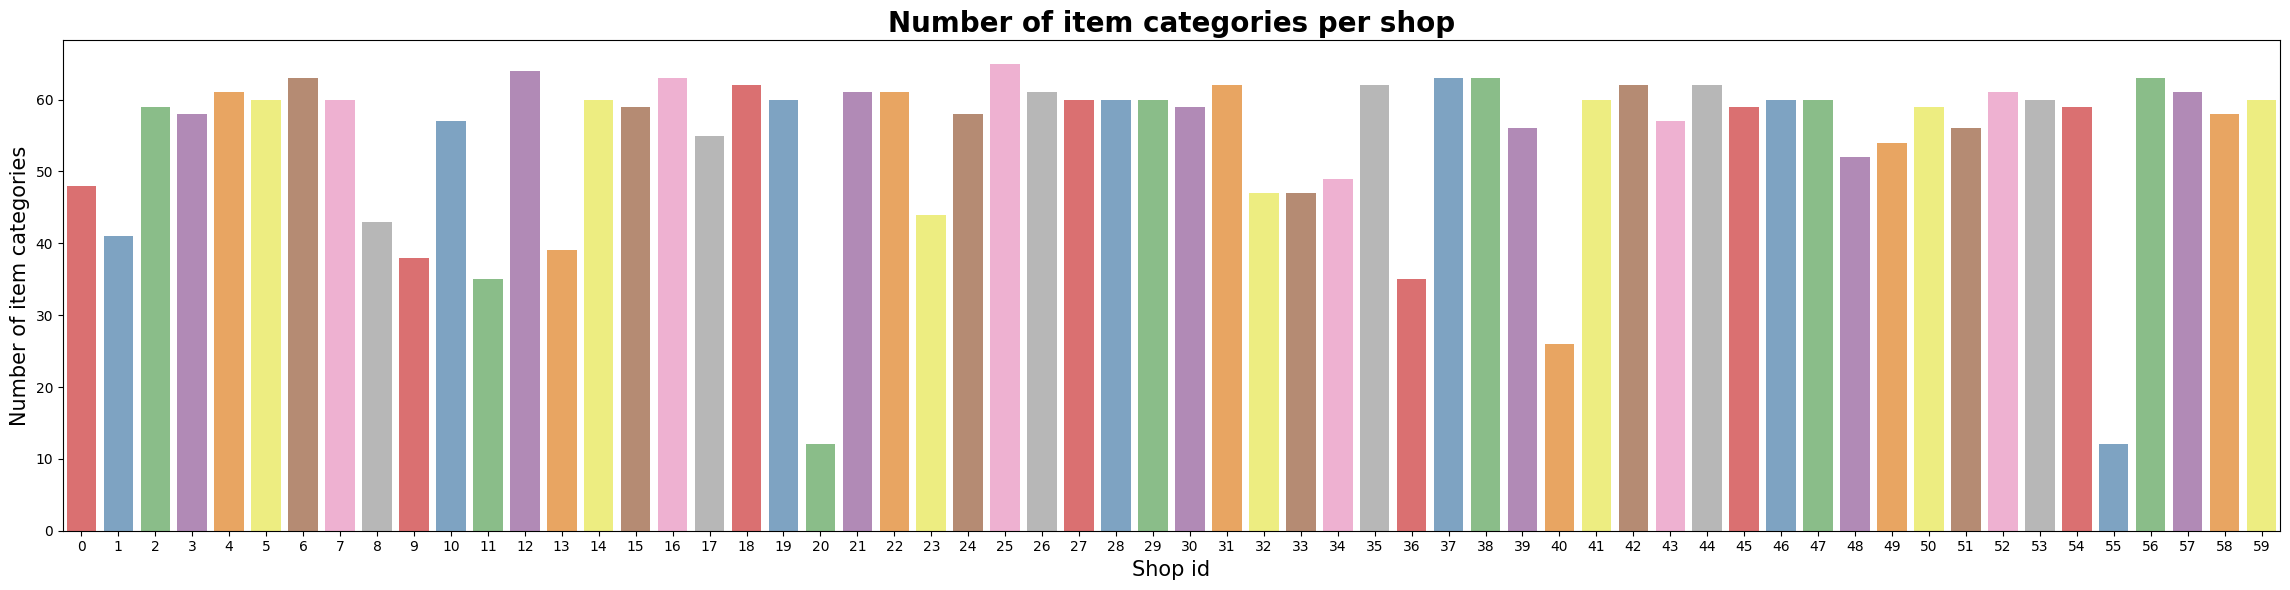

In [ ]:
item_category_dist_shop = sales_df.merge(item_df,how='left',on='item_id')[['shop_id','item_category_id']] \
                                  .drop_duplicates().groupby('shop_id')['item_category_id'].count().reset_index(name='number_item_category')
plt.figure(figsize=(23,6))
sns.barplot(data=item_category_dist_shop,x='shop_id',y='number_item_category',alpha=0.7,palette='Set1')
plt.title('Number of item categories per shop',fontsize=20,fontweight='bold')
plt.xlabel('Shop id',fontsize=15)
plt.ylabel('Number of item categories',fontsize=15)
plt.tight_layout()
plt.show()

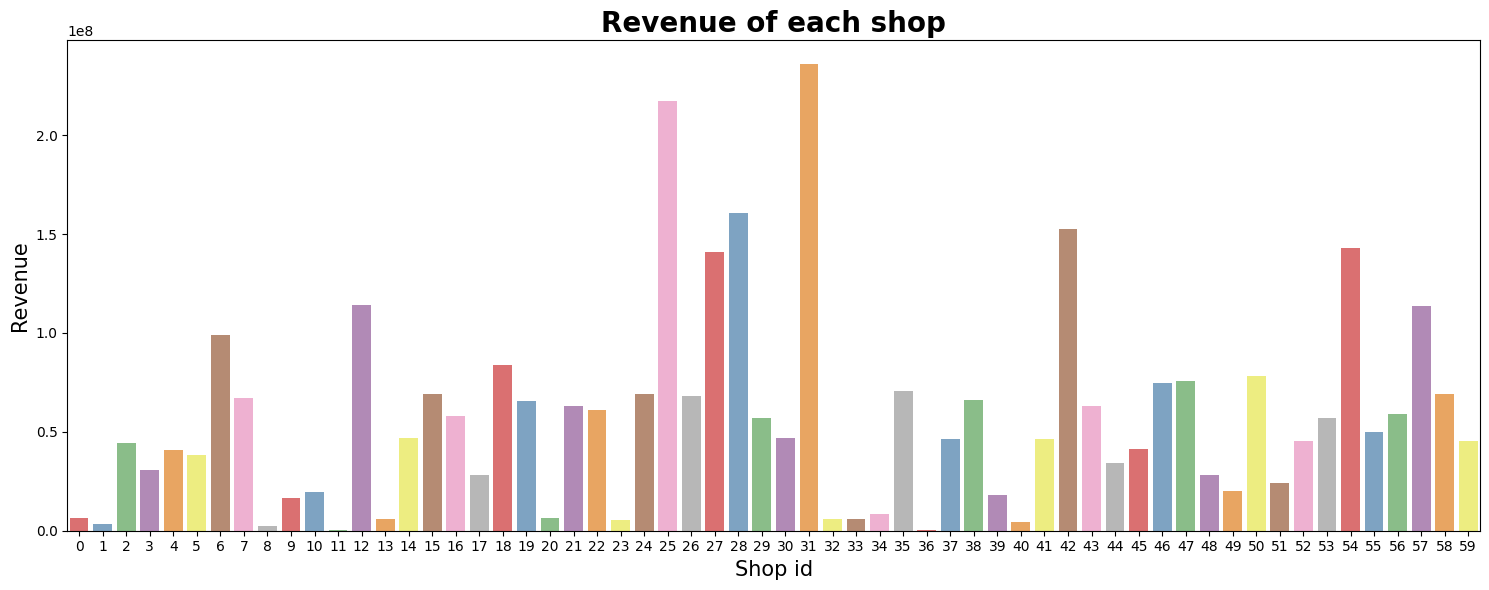

In [ ]:
sales_df['revenue'] = sales_df.item_price*sales_df.item_cnt_day
shop_revenue = sales_df.groupby('shop_id')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=shop_revenue,x='shop_id',y='revenue',alpha=.7,palette='Set1')
plt.title('Revenue of each shop',fontsize=20,fontweight='bold')
plt.xlabel('Shop id',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.tight_layout()
plt.show()

# Processing and modelling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

item_price_scaled = scaler.fit_transform(np.array(sales_df.item_price).reshape(-1,1))
sales_df['item_price'] = item_price_scaled.reshape(1,-1)[0].tolist()

In [ ]:
raw_df = sales_df.groupby(['shop_id','item_id','item_price','month'])['item_cnt_day'].sum().reset_index(name='item_cnt_month')
raw_df = pd.merge(raw_df, item_df[['item_id','item_category_id']], on = 'item_id')
raw_df

,shop_id,item_id,item_price,month,item_cnt_month,item_category_id
0,0,30,0.000860,2,31.000000,40
1,1,30,0.000860,2,10.000000,40
2,2,30,0.000549,4,1.000000,40
3,2,30,0.000549,5,1.000000,40
4,2,30,0.001165,3,1.000000,40
...,...,...,...,...,...,...
1640230,59,9760,0.000581,1,1.000000,37
1640231,59,12846,0.000484,11,1.000000,37
1640232,59,16270,0.003247,7,1.000000,75
1640233,59,17732,0.000643,10,1.000000,28


In [ ]:
raw_df = raw_df.groupby(['shop_id','item_id','item_category_id'])['item_cnt_month'].mean().reset_index(name='item_cnt_month')
raw_df

,shop_id,item_id,item_category_id,item_cnt_month
0,0,30,40,31.000000
1,0,31,37,11.000000
2,0,32,40,8.000000
3,0,33,37,3.000000
4,0,35,40,7.500000
...,...,...,...,...
424119,59,22154,37,1.000000
424120,59,22155,37,1.000000
424121,59,22162,40,3.200000
424122,59,22164,37,1.500000


In [ ]:
len(test_df)

214200

In [ ]:
# split the dataset into 2 part: including the data to predict in test_df, and not including these data
train_data = raw_df[~raw_df[['shop_id','item_id']].index.isin(test_df[['shop_id','item_id']].index)].reset_index(drop=True)
pred_data = raw_df[raw_df[['shop_id','item_id']].index.isin(test_df[['shop_id','item_id']].index)].reset_index(drop=True)

In [ ]:
train_data.head()

,shop_id,item_id,item_category_id,item_cnt_month
0,30,16397,30,2.437500
1,30,16403,40,1.000000
2,30,16404,40,1.000000
3,30,16405,40,1.000000
4,30,16407,40,1.000000


In [ ]:
len(pred_data), len(train_data)

(214200, 209924)

You can see that, the data for predicting is much more than the data for training. But I think, 209924 samples is enough for model to training.
With training data, we will split into 2 part: training and testing the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_data.drop(columns=['item_cnt_month'],axis=1)
Y = train_data['item_cnt_month']

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,random_state=42)

In [ ]:
import xgboost as xgb

Using GridSearchCV for fine-tuning XGB model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5], #providing l1 regularization to the weight
    "reg_lambda": [0, 0.5, 1, 5], #providing l2 regularization to the weight
    'n_estimators': [5,10,15],
    'max_depth': np.arange(1,6)
    }

xgboost = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=param_grid, estimator=xgboost,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(X_train, Y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 15, 'reg_alpha': 1, 'reg_lambda': 0.5}
Lowest RMSE found:  3.4777112112247126


In [ ]:
model = xgb.XGBRegressor(colsample_bytree= 0.8, max_depth= 5, n_estimators= 15, reg_alpha= 5, reg_lambda= 0)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.669 (0.030)


In [ ]:
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# evaluate the predict of test-data splitting from the dataset

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,y_pred)

13.813116470238661

# evaluate the predict of test-data from test_df

I don't have the answer for these data samples, but, because this data sample is in the sales_df, so I will use the item_cnt_month of these for the answer

In [ ]:
submission_pred_data = pred_data.drop(['item_cnt_month'], axis=1)
submission_label_by_dataset = pred_data['item_cnt_month']

In [ ]:
y_pred_submission = model.predict(submission_pred_data)
mean_squared_error(submission_label_by_dataset,y_pred_submission)

11.73280837666531